In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from tf.keras.layers import Dense
#from tf.keras.model import Sequential

In [92]:
df=pd.read_csv(r"C:\Users\MAHESH\seaborn-data\kidney_disease_mini project.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [93]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [94]:
data=df.drop(['id'], axis=1)

In [95]:
data.shape

(400, 25)

In [96]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [98]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
categorial_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [99]:
numerical_cols = [x for x in data.columns if not x in categorial_cols]
numerical_cols

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [100]:
for i in ['rc','wc','pcv']:
    data[i] = data[i].str.extract('(\d+)').astype(float)

In [101]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    data[i].fillna(data[i].mean(),inplace=True)

In [102]:
rbc=data['rbc'].map({'normal':1, 'abnormal':0})


In [103]:
pc=data['pc'].map({'normal':1, 'abnormal':0})

In [104]:
pcc=data['pcc'].map({'present':0, 'notpresent':1})

In [105]:
ba=data['ba'].map({'notpresent':1, 'present':0})

In [106]:
data.drop(["rbc","pc","pcc","ba"],axis=1,inplace=True)

In [107]:
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,44.0,7800.0,5.000000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,38.0,6000.0,4.241636,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,31.0,7500.0,4.241636,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,32.0,6700.0,3.000000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,35.0,7300.0,4.000000,no,no,no,good,no,no,ckd


In [108]:
data = pd.concat([data,rbc,pc,pcc,ba],axis=1)

In [109]:
data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm,cad,appet,pe,ane,classification,rbc,pc,pcc,ba
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,yes,no,good,no,no,ckd,NaN,1.0,1.0,1.0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,no,no,good,no,no,ckd,NaN,1.0,1.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,yes,no,poor,no,yes,ckd,1.0,1.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,no,no,poor,yes,yes,ckd,1.0,0.0,0.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,no,no,good,no,no,ckd,1.0,1.0,1.0,1.0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             398 non-null    object 
 15  dm              398 non-null    object 
 16  cad             398 non-null    object 
 17  appet           399 non-null    obj

In [111]:
k=data["age"].apply(lambda x : int(x)//10).to_list()

In [112]:
a=[0]*10
for i in range(len(k)):
    a[k[i]]+=1
a

[10, 11, 23, 43, 71, 91, 96, 47, 7, 1]

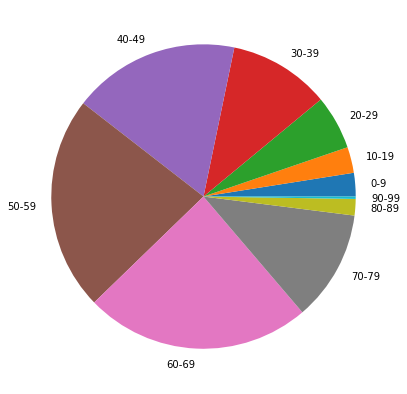

In [113]:
plt.figure(figsize= (7,7))
x_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
y_labels = np.array(a)
plt.pie(y_labels, labels = x_labels)
#plt.pie(x=data["age"],labels=data["classification"])
plt.show() 

In [114]:
data["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [115]:
data.replace({"notckd":0,"ckd":1,"ckd\t":1},inplace=True)

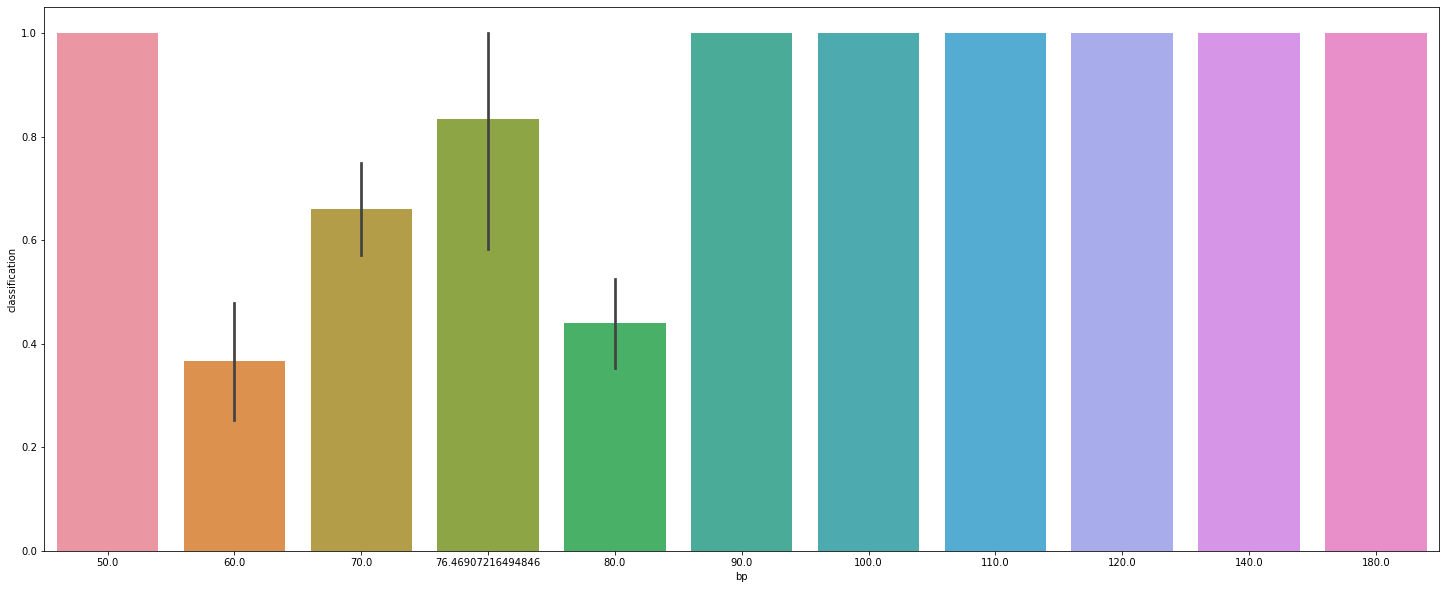

In [116]:
plt.figure(figsize=(25,10))
sns.barplot(x =data['bp'],y =data['classification'],data=data)
plt.show()


C:\Users\MAHESH\ansel\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MAHESH\ansel\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

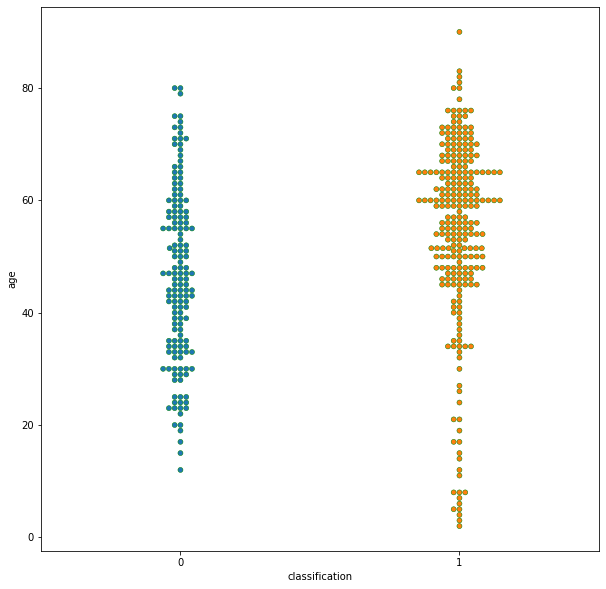

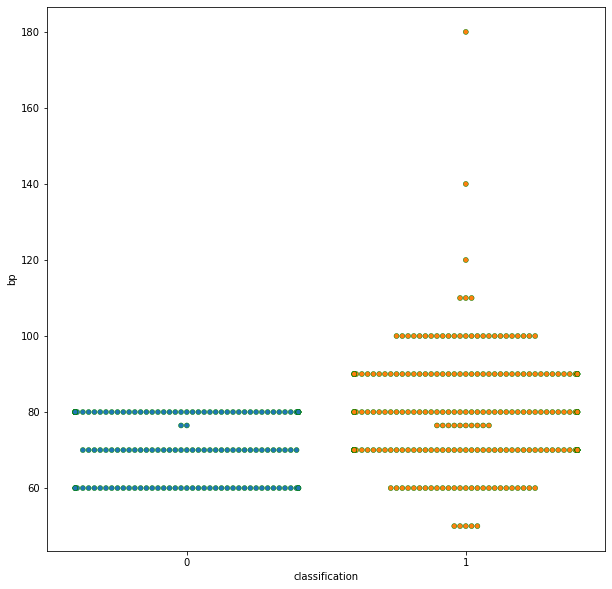

<Figure size 720x720 with 0 Axes>

In [117]:
plt.figure(figsize=(10,10))
sns.swarmplot(y=data["age"], x = data["classification"],linewidth=0.5,edgecolor='green')
plt.figure(figsize=(10,10))
sns.swarmplot(y=data["bp"], x = data["classification"],linewidth=0.5,edgecolor='green')
plt.figure(figsize=(10,10))
# SIMILARLLY WE CAN CO RELATE THE GRAPHS BETWEEN REMAINING ATTRIBUTES AND CLASSIFICATION.

In [118]:
data["appet"].value_counts()

good    317
poor     82
Name: appet, dtype: int64

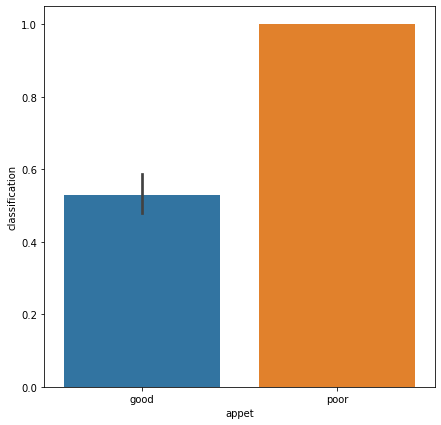

In [119]:
plt.figure(figsize=(7,7))
sns.barplot(x =data['appet'],y =data['classification'],data=data)
plt.show()

In [120]:
data.replace({"good":1,"poor":0},inplace=True)

In [121]:
data["ane"].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [122]:
data.replace({"no":0,"yes":1,"\tno":0,"\tyes":1," yes":1},inplace=True)

In [123]:
data.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
rbc               152
pc                 65
pcc                 4
ba                  4
dtype: int64

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             398 non-null    float64
 15  dm              398 non-null    float64
 16  cad             398 non-null    float64
 17  appet           399 non-null    flo

In [125]:
data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [126]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             400 non-null    float64
 15  dm              400 non-null    float64
 16  cad             400 non-null    float64
 17  appet           400 non-null    flo

In [127]:
#Splitting Train Data and Test Data

In [128]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'rbc', 'pc', 'pcc', 'ba'],
      dtype='object')

In [129]:
X = data.loc[:,['age', 'bp','sc','rc','wc','appet','pc','htn','hemo','bgr','dm','ane']]
y = data["classification"]
#X = data.loc[:, data.columns != 'classification']
#y = data['classification']

In [130]:
# 'k' Values lies from 0.1 to 0.9, i.e the size of testing data in percentage.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9,random_state = 80)
X_train.head()

,age,bp,sc,rc,wc,appet,pc,htn,hemo,bgr,dm,ane
252,45.0,80.0,0.6,4.000000,9100.000000,1.0,1.0,0.0,15.900000,82.0,0.0,0.0
230,65.0,60.0,1.7,4.241636,9500.000000,0.0,0.0,1.0,12.526437,192.0,1.0,0.0
152,39.0,70.0,0.8,4.241636,8406.122449,1.0,1.0,0.0,10.900000,121.0,1.0,0.0
386,46.0,70.0,0.5,6.000000,5700.000000,1.0,1.0,0.0,16.400000,100.0,0.0,0.0
302,29.0,70.0,1.2,4.241636,8406.122449,1.0,1.0,0.0,14.800000,127.0,0.0,0.0


In [131]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
rbc               0
pc                0
pcc               0
ba                0
dtype: int64

In [132]:
#USING SUPPORT VECTOR MACHINE

In [133]:
model2 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
             probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
             max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
model2.fit(X_train,y_train)

SVC(kernel='linear')

In [134]:
print("the mean absolute error is",mean_absolute_error(y_test,model2.predict(X_test)))

the mean absolute error is 0.06388888888888888


In [135]:
print("the accuracy of the train data is ",model2.score(X_train,y_train)*100)

the accuracy of the train data is  100.0


In [136]:
print("the accuracy of the test data is",model2.score(X_test,y_test)*100)

the accuracy of the test data is 93.61111111111111


In [137]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'rbc', 'pc', 'pcc', 'ba'],
      dtype='object')

In [138]:
model2.predict([[148.0,700.0,1.7,5.9000,1300.000000,1.0,1.0,1.0,16.000000,94.000000,1.0,1.0]])
#notckd=0
#ckd=1

C:\Users\MAHESH\ansel\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [139]:
#LOGISTIC REGRESSION

In [140]:
min_max = MinMaxScaler()
min_max.fit(X)
X = min_max.transform(X)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=30)

In [142]:
log = LogisticRegression(penalty='l2',dual=False, tol=0.9, C=1.0, fit_intercept=True, 
                         intercept_scaling=1, class_weight=None, random_state=None, 
                         solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, 
                         warm_start=False, n_jobs=None, l1_ratio=None)
cv_v = cross_val_score(log, X_train, y_train, cv=4)
print(cv_v)
print(cv_v.std())
print(cv_v.mean())

[0.8 0.7 0.8 0.8]
0.043301270189221974
0.7749999999999999


In [143]:
log.fit(X_train,y_train)

LogisticRegression(tol=0.9)

In [144]:
y_pred = log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       131
           1       1.00      0.79      0.88       229

    accuracy                           0.86       360
   macro avg       0.86      0.89      0.86       360
weighted avg       0.90      0.86      0.87       360



In [145]:
log.predict([[66.0,70.0,1.7,5.900000,5300.000000,1.0,0.0,0.0,16.000000,94.000000,0.0,0.0]])

array([1], dtype=int64)

In [146]:
#RANDOM FOREST ALGORITHM

In [147]:
indo = RandomForestClassifier(n_estimators=500, criterion='entropy', 
                              max_depth=None, min_samples_split=2, min_samples_leaf=2, 
                              min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, 
                              random_state=None, verbose=0, warm_start=False, class_weight=None, 
                              ccp_alpha=0.0, max_samples=None)
indo.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, n_estimators=500)

In [148]:
predictions = indo.predict(X_test)

In [149]:
print("The mean absolute error by using the RandomForest is",mean_absolute_error(y_test,predictions))

The mean absolute error by using the RandomForest is 0.05555555555555555


In [150]:
print("the accuracy of the train data is ",indo.score(X_train,y_train)*100)

the accuracy of the train data is  100.0


In [151]:
print("the accuracy of the test data is",indo.score(X_test,y_test)*100)

the accuracy of the test data is 94.44444444444444


In [152]:
indo.predict([[66.0,70.0,1.8,5.900000,5300.000000,0.0,0.0,0.0,16.000000,94.000000,0.0,0.0]])

array([0], dtype=int64)

In [153]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       131
           1       0.97      0.94      0.96       229

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



In [154]:
predictions1=indo.predict(X_train)

In [155]:
print(classification_report(y_train,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [156]:
confusion_matrix(y_test,predictions)

array([[124,   7],
       [ 13, 216]], dtype=int64)

In [157]:
confusion_matrix(y_train,predictions1)

array([[19,  0],
       [ 0, 21]], dtype=int64)

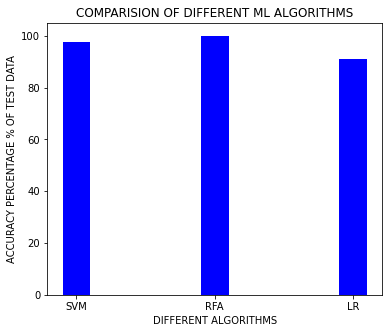

In [158]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'SVM':97.5, 'RFA':100, 'LR':91}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.2)
 
plt.xlabel("DIFFERENT ALGORITHMS")
plt.ylabel("ACCURACY PERCENTAGE % OF TEST DATA")
plt.title("COMPARISION OF DIFFERENT ML ALGORITHMS")
plt.show()

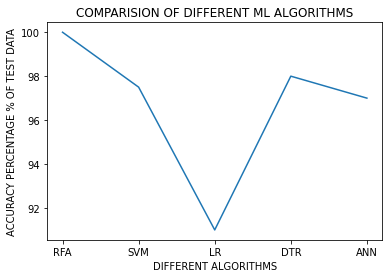

In [159]:
import matplotlib.pyplot as plt

x=["RFA", "SVM", "LR", "DTR", "ANN"]
y=[100,97.5,91,98,97]

plt.xlabel("DIFFERENT ALGORITHMS")
plt.ylabel("ACCURACY PERCENTAGE % OF TEST DATA")
plt.title("COMPARISION OF DIFFERENT ML ALGORITHMS")
plt.plot(x,y)
plt.show()

In [160]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor

In [161]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [162]:
y1_pred=model1.predict(X_test)
y1_pred

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [163]:
model1.score(X_train,y_train)*100

100.0

In [164]:
model1.score(X_test,y1_pred)*100

100.0

In [165]:
from sklearn.metrics import confusion_matrix

In [166]:
confusion_matrix(y_test,y1_pred)

array([[125,   6],
       [ 12, 217]], dtype=int64)

In [167]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       131
           1       0.97      0.95      0.96       229

    accuracy                           0.95       360
   macro avg       0.94      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [168]:
prediction2=model1.predict(X_train)

In [169]:
confusion_matrix(y_train,prediction2)

array([[19,  0],
       [ 0, 21]], dtype=int64)

In [170]:
#ARTIFICIAL NEURAL NETWORK

In [171]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu

In [172]:
model5=Sequential()

model5.add(Dense(64,activation="relu",input_dim=12))

model5.add(Dense(32,activation="relu"))

model5.add(Dense(16,activation="relu"))

model5.add(Dense(1,activation="sigmoid"))

In [173]:
model5.compile(loss="binary_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [174]:
model5.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 0.6915 - accuracy: 0.6750
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.7500
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6740 - accuracy: 0.7750
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6684 - accuracy: 0.7250
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6626 - accuracy: 0.7750
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6577 - accuracy: 0.7750
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6533 - accuracy: 0.7750
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6482 - accuracy: 0.8000
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6437 - accuracy: 0.8000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6383 - accuracy: 0.8250
Epoch 11/100
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.9750
Epoch 85/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9750
Epoch 86/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.9500
Epoch 87/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9500
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.9500
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 0.1163 - accuracy: 0.9500
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.9750
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9750
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9750
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9750
Epoch 94/100
2/2 [===============

In [175]:
y_pred5=model5.predict(X_test)
y_pred5

12/12 [==============================] - 0s 2ms/step


array([[0.9999994 ],
       [0.03426578],
       [0.03279847],
       [0.9916259 ],
       [0.02676562],
       [0.05183294],
       [0.9993678 ],
       [0.02892601],
       [0.6544516 ],
       [0.33339128],
       [0.9998317 ],
       [0.9945795 ],
       [0.9997672 ],
       [0.99896646],
       [0.99997115],
       [0.99968016],
       [0.9998306 ],
       [0.9994353 ],
       [0.21667106],
       [0.10295532],
       [0.90564317],
       [0.99963003],
       [0.9695717 ],
       [0.40879568],
       [0.99784404],
       [0.99797714],
       [0.01978563],
       [0.9996233 ],
       [0.99996996],
       [0.24096762],
       [0.9999882 ],
       [0.9999425 ],
       [0.9655851 ],
       [0.99993914],
       [0.39341635],
       [0.03168846],
       [0.99927986],
       [0.10068926],
       [0.30451965],
       [0.99658823],
       [0.9999954 ],
       [0.02176731],
       [0.14164019],
       [0.417533  ],
       [0.98778707],
       [0.99993384],
       [0.999996  ],
       [0.019

In [176]:
y_prediction5=np.stack(y_pred5)
y_prediction5

array([[0.9999994 ],
       [0.03426578],
       [0.03279847],
       [0.9916259 ],
       [0.02676562],
       [0.05183294],
       [0.9993678 ],
       [0.02892601],
       [0.6544516 ],
       [0.33339128],
       [0.9998317 ],
       [0.9945795 ],
       [0.9997672 ],
       [0.99896646],
       [0.99997115],
       [0.99968016],
       [0.9998306 ],
       [0.9994353 ],
       [0.21667106],
       [0.10295532],
       [0.90564317],
       [0.99963003],
       [0.9695717 ],
       [0.40879568],
       [0.99784404],
       [0.99797714],
       [0.01978563],
       [0.9996233 ],
       [0.99996996],
       [0.24096762],
       [0.9999882 ],
       [0.9999425 ],
       [0.9655851 ],
       [0.99993914],
       [0.39341635],
       [0.03168846],
       [0.99927986],
       [0.10068926],
       [0.30451965],
       [0.99658823],
       [0.9999954 ],
       [0.02176731],
       [0.14164019],
       [0.417533  ],
       [0.98778707],
       [0.99993384],
       [0.999996  ],
       [0.019

In [177]:
predict5=model5.predict(X_train)
predict5

2/2 [==============================] - 0s 0s/step


array([[0.0528253 ],
       [0.8932037 ],
       [0.9999991 ],
       [0.98479545],
       [0.9999158 ],
       [0.130542  ],
       [0.9999742 ],
       [0.16449912],
       [0.0250774 ],
       [0.9156845 ],
       [0.99999017],
       [0.9826648 ],
       [0.9261498 ],
       [0.9999411 ],
       [0.124662  ],
       [0.9999755 ],
       [0.29134646],
       [0.02058716],
       [0.0300258 ],
       [0.82914895],
       [0.99916625],
       [0.07082301],
       [0.99995965],
       [0.10091591],
       [0.31338853],
       [0.02488471],
       [0.99998397],
       [0.99998707],
       [0.9995093 ],
       [0.17509426],
       [0.02951343],
       [0.04001682],
       [0.9862995 ],
       [0.9999821 ],
       [0.07802354],
       [0.02558032],
       [0.02275299],
       [0.5972642 ],
       [0.02703224],
       [0.02805608]], dtype=float32)

In [178]:
model1.predict([[66.0,70.0,1.8,5.900000,5300.000000,0.0,0.0,0.0,16.000000,94.000000,0.0,0.0]])

array([0.])

In [179]:
model5.predict([[148.0,700.0,1.7,5.9000,1300.000000,1.0,1.0,1.0,16.000000,94.000000,1.0,1.0]])

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)